# Curve Fitting
Curve fitting is an optimization process of constructing a curve, or mathematical function, that has the best fit to a series of data points that may be subject to constraints. The process of curve fitting can involve interpolation, the process of estimating new data points in the range of a discrete set of known data points. Curve fitting can assist with extrapolation, the process of estimating new data points outside of the range of known data points.

Python implements curve fitting through a function located in the `scipy.optimize` package. By using the function `curve_fit`, you can define a model fit function and method of fit, and obtain the best fit parameters and a covariance matrix for the parameters.

## Methods of Fit
`curve_fit` uses one of 3 methods to fit data. The fitting method is specified in the `curve-fit` function using the argument, `method='lm'`. 

### `lm`
The default method is the Levenberg-Marquardt algorithm, also called the damped least-squares. The LM method interpolates between the Gauss-Newton algorithm and the method of gradient descent. In general terms, given $m$ pairs of data $(x_i,y_i)$, it finds the parameter(s) $\beta$ of the model function $f(x,\beta)$ that minimizes the sum of the squares of the deviations, that is 
$$\sum_{i=1}^{m}[y_i-f(x_i,\beta)]^2$$
The algorithm does this through an iterative process. Note that this algorithm will no work if the number of points $m$ is less than the number of parameters in the function.

### `trf`
The second method is known as the *trust region method*. This method fits the parameters using a least-squares-like measurement in defined regions of the data. These regions expand and contract based on the goodness of fit in the current region. These sets of algorithms are also referred to as *restricted-step methods*

### `dogbox`
The last method is the *Powell's dog leg method*. This method is an iterative optimisation algorithm silmilar to the Levenberg-Marquardt algorithm, but it uses a explicit trust region in each iteration. In each step, it searches for a minimum in the objective functions along the steepest descent direction. Its name comes from the resemblance between the construction of the dog leg step and the shape of a [dogleg hole](https://en.wikipedia.org/wiki/Golf_course#Fairway_and_rough) in golf


## How do you go about fitting the statistical model to the data?

Let's consider some alpha particle decay data, it is contained in the `alphadecay.txt` file. The file contains 3 columns: time of measurement (in days), rate of decay (in detections per second), and the uncertainty in the rate of decay. The rate of decay is described by the function
$$R(t) = R_0 e^{-t/\tau}$$  
where $\tau$ is the mean lifetime of the alpha particle. In an ideal world, we could isolate the laboratory completely, however, some of the measured alpha decays in the data set are from background radioactivity. Instead, we can describe this data by adding a parameter,
$$R(t) = R_0 e^{-t/\tau} + R_{bkgd}$$



In [13]:
import numpy as np
import pandas as pd
import scipy.optimize as sy

decayfile = pd.read_table('data/alphadecay.txt', sep= '\s+', header=None)
x_time = decayfile.loc[:,0]
y_rate = decayfile.loc[:,1]
#define fit function
def decayfit(x, a, b, c):
    return a*np.exp(-x/b)+c
#fit 
param, covar = sy.curve_fit(decayfit, x_time, y_rate, p0=[2 ,1,1],method= 'trf')


In [15]:
#mean lifetime
param[1]

3.922565845852741

In [3]:
#covariance matrix
covar

array([[ 1.09885924e-03, -2.05742810e-03, -9.95152370e-06],
       [-2.05742810e-03,  1.21572555e-02, -3.94372545e-04],
       [-9.95152370e-06, -3.94372545e-04,  5.31141457e-05]])

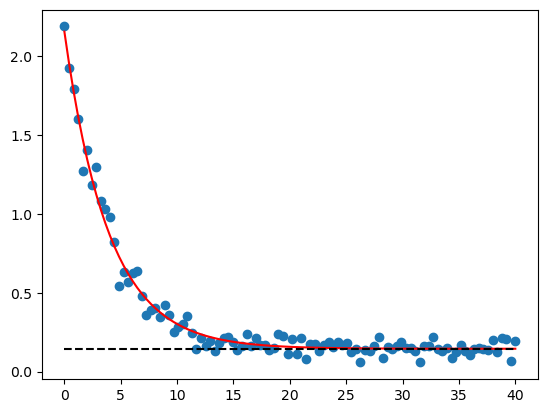

In [16]:
import matplotlib.pyplot as mp
#plot data and fit function
mp.scatter(x_time, y_rate)
mp.plot(x_time, decayfit(x_time,param[0],param[1],param[2]),'r')
#plot constant background
mp.plot(x_time,param[2]*np.ones(len(x_time)),'k--')

## Covariant Matrix
The second parameter returned by `curve_fit` is the [covariance matrix](https://en.wikipedia.org/wiki/Estimation_of_covariance_matrices) for the fit parameters. The covariance matrix is a measure of the uncertainty in the parameter estimates. It is a square matrix with dimensions equal to the number of parameters in the fit function. The diagonal elements of the matrix are the variances of the individual parameters, or the uncertainty in those estimates. The off-diagonal elements are the covariances between the parameters, which represent the degree of correlation between the estimates of those parameters. The elements themselves hold very little information, but statistics derived from them are useful.

In [5]:
covar

array([[ 1.09885924e-03, -2.05742810e-03, -9.95152370e-06],
       [-2.05742810e-03,  1.21572555e-02, -3.94372545e-04],
       [-9.95152370e-06, -3.94372545e-04,  5.31141457e-05]])

Many sources use a colormap to get an impression of the covariance matrix.

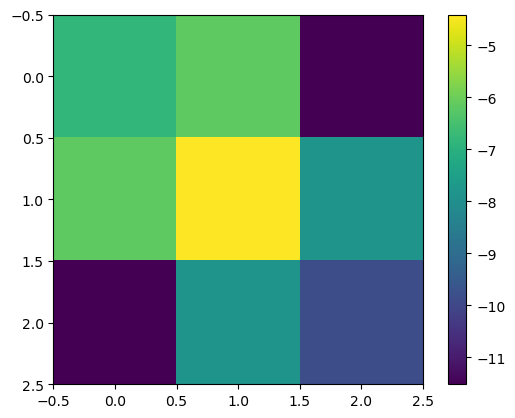

In [7]:
mp.imshow(np.log(np.abs(covar)))
mp.colorbar()
mp.show()

The correlation between two parameters can be calculated. This tells you how independent they are.

In [18]:
Rsquared = covar[0,1]/np.sqrt(covar[0,0]*covar[1,1])
print(Rsquared)

-0.5629057518453618


# Particle Physics Example
Let's look through the file `dimuon.csv`. This file contains data about particle collisions resulting in two muons. The columns contain the energy, momentum, and charge of each muon pair. The last column `M` contains the invariant mass calculation of the parent particle in the interaction: $X\rightarrow \mu^+\mu^-$. By analyzing the invariant mass values, you can find the identity of particle $X$.  

In [19]:
import pandas as pd
data = pd.read_csv('data/dimuon.csv')

In [20]:
data

,Type,Run,Event,E1,px1,py1,pz1,pt1,Q1,E2,px2,py2,pz2,pt2,Q2,M
0,GT,146511,25343052,7.33390,2.060420,5.88580,-3.85836,6.23602,-1,5.20755,-1.550160,-1.819760,4.62525,2.39050,1,11.82820
1,GG,146511,25341481,18.46720,8.033950,-3.94072,-16.15410,8.94839,-1,10.72950,6.294760,-2.524410,-8.31349,6.78208,1,2.58406
2,GG,146511,25390065,7.70222,-0.248771,4.08338,6.52511,4.09095,-1,6.90202,-3.024390,3.751290,4.94041,4.81862,1,3.11929
3,GG,146511,25391068,6.59462,5.246510,2.16082,3.35900,5.67407,1,7.43461,-5.060690,4.408010,3.19704,6.71127,-1,10.51920
4,GG,146511,25489877,45.77350,8.864420,1.28931,-44.88830,8.95770,-1,9.27485,-3.646960,-0.276874,8.52260,3.65745,1,40.98300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,GG,146510,209126492,17.86720,-2.053890,2.70372,17.54130,3.39538,1,16.26420,-3.914730,-12.028600,10.22260,12.64960,1,16.47860
99996,GT,146510,209181268,22.45350,2.991560,-12.67420,-18.29110,13.02240,1,4.71292,-0.250232,-2.176830,-4.17124,2.19117,-1,2.32171
99997,GT,146510,209199660,8.09128,-1.805550,-2.29272,-7.54593,2.91832,-1,4.33412,1.778710,-2.187670,-3.28995,2.81952,1,4.11094
99998,GT,146510,209209004,9.72188,4.608720,2.11413,-8.29421,5.07049,1,5.13298,3.917130,0.749418,-3.22967,3.98817,-1,2.64139


array([[<Axes: title={'center': 'M'}>]], dtype=object)

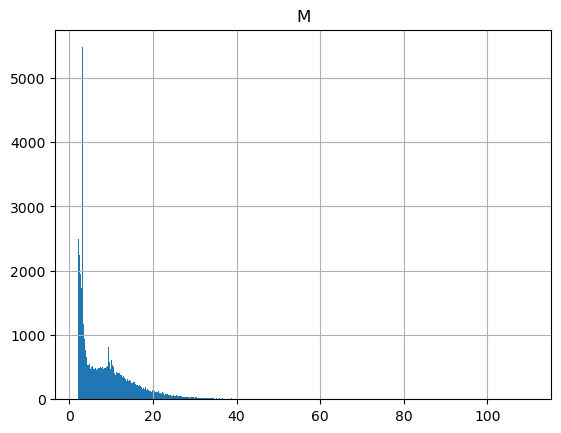

In [21]:
#look at the data
data.hist('M',bins=1000)

array([[<Axes: title={'center': 'M'}>]], dtype=object)

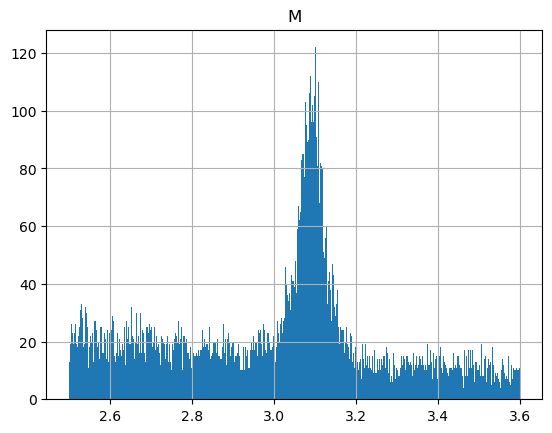

In [22]:
#make a cut on the data
data[(data.M<3.6) & (data.M>2.5)].hist('M',bins=1000)

In [23]:
focus = data[(data.M<3.6) & (data.M>2.5)]

In [25]:
#define the fit to Breit-Wigner function
def bw(x,k,M,g):
    return k/((x**2-M**2)**2 + g**2*M**2)

In [24]:
#get parameters of the histogram to put in curve fit
counts, bins = np.histogram(focus.M,bins=1000)
newbins = np.zeros(len(counts))
for k in range(0,len(bins)-1):
    newbins[k] = (bins[k]+bins[k+1])/2

In [29]:
len(counts)

1000

In [30]:
muparams,mucovar = sy.curve_fit(bw,newbins,counts,p0 = [300,3.9,0.25],method='lm')

In [31]:
muparams

array([11.47770946,  3.09096229,  0.11634621])

In [ ]:
mucovar

(array([ 23.,  13.,  17.,  19.,  18.,  26.,  15.,  18.,  23.,  38.,  19.,
         18.,  23.,  22.,  26.,  23.,  19.,  25.,  15.,  18.,  30.,  22.,
         27.,  25.,  27.,  31.,  19.,  33.,  20.,  19.,  28.,  17.,  18.,
         23.,  19.,  19.,  32.,  15.,  21.,  30.,  22.,  25.,  23.,  11.,
         20.,  18.,  17.,  22.,  28.,  22.,  20.,  17.,  23.,  28.,  13.,
         20.,  27.,  20.,  14.,  27.,  18.,  24.,  24.,  18.,  23.,  20.,
         24.,  14.,  19.,  15.,  25.,  20.,  25.,  26.,  16.,  25.,  16.,
         24.,  23.,  20.,  25.,  21.,  20.,  14.,  19.,  24.,  21.,  13.,
         21.,  19.,  23.,  19.,  22.,  15.,  24.,  25.,  29.,  11.,  27.,
         22.,  17.,  15.,  29.,  13.,  22.,  16.,  13.,  23.,  22.,  21.,
         15.,  27.,  21.,  16.,  17.,  16.,  15.,  24.,  19.,  19.,  16.,
         17.,  24.,  25.,  16.,  12.,  15.,  27.,  27.,  21.,  21.,  22.,
         25.,  25.,  19.,  15.,  19.,  16.,  32.,  22.,  20.,  22.,  21.,
         21.,  22.,  14.,  17.,  20., 

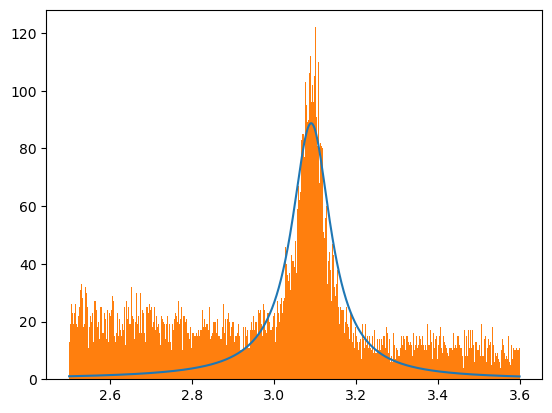

In [32]:
#see how the fit appears in graphs
mp.plot(newbins,bw(newbins,muparams[0],muparams[1],muparams[2]))
mp.hist(focus.M,bins=1000)

In [ ]:
data[data.pt2<20].hist('pt2',bins=1000)

# Is this curve fitting or linear regression?
The distinction between curve fitting and linear regression is fuzzy. In my opinion, curve fitting becomes linear regression when you have a hypothesis about how the data is generated (what physical phenomena is producing the data) and how the parameters relate to one another, and when you dig deeper into the statistical analysis of the parameters and the data.